In [2]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0: malignant, 1: benign

# Display basic info
print("Dataset Shape:", X.shape)
print("Feature Names:", X.columns.tolist())

Dataset Shape: (569, 30)
Feature Names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [3]:
# Check for missing values
print("Missing Values:\n", X.isnull().sum().sum())

# Remove outliers using IQR method
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Select numeric features for outlier removal
numeric_cols = X.columns.tolist()  # All features are numeric
X_clean = remove_outliers(X, numeric_cols)
y_clean = y[X_clean.index]  # Align target with cleaned data

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_clean), columns=X_clean.columns, index=X_clean.index)

# Print cleaned dataset shape
print("Cleaned Dataset Shape:", X_clean.shape)

Missing Values:
 0
Cleaned Dataset Shape: (277, 30)


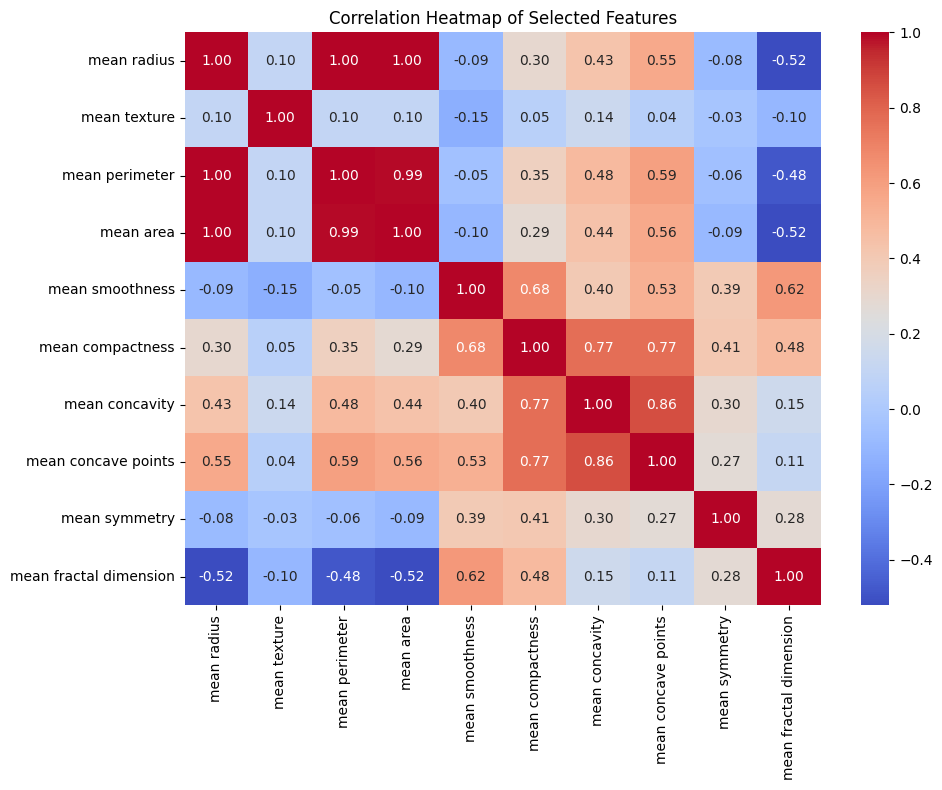

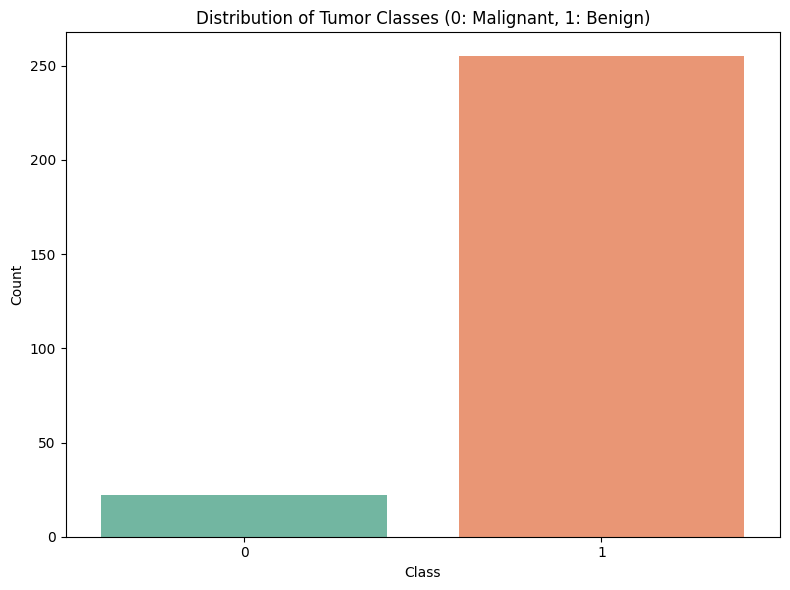

In [4]:
# Correlation heatmap (using a subset of features for clarity)
plt.figure(figsize=(10, 8))
subset_features = X_clean.columns[:10]  # First 10 features for readability
sns.heatmap(X_clean[subset_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

# Target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_clean, palette='Set2')
plt.title('Distribution of Tumor Classes (0: Malignant, 1: Benign)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.96      0.96      0.96        53

    accuracy                           0.93        56
   macro avg       0.65      0.65      0.65        56
weighted avg       0.93      0.93      0.93        56



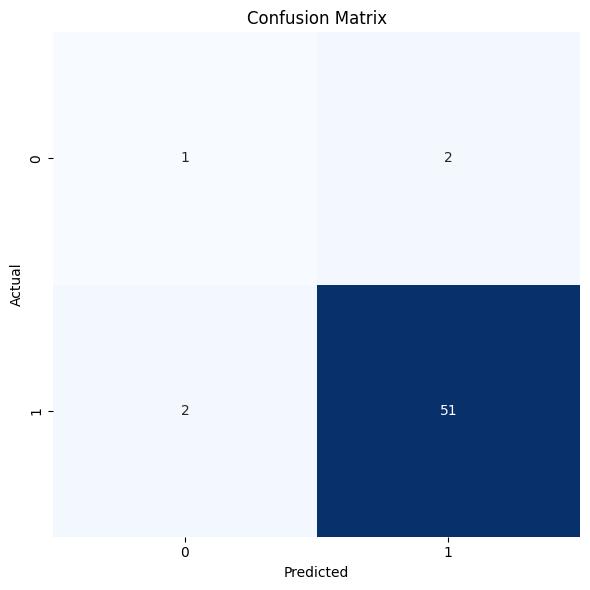

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()